# Get plots on Visual Property Norms results


This notebook also contains the code for generating the plots presented in the article. See the last part.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
RESULTS_FILE = "data/results/results.csv"
load_results = True
if load_results:
    results = pd.read_csv(RESULTS_FILE)

In [3]:
results["top10_preds"] = results.top10_preds.apply(ast.literal_eval)
results["gold_labels"] = results.gold_labels.apply(ast.literal_eval)

In [4]:
results

,model,concept,query_template,feature_starter,pf,score,masked_score,nbr_alternatives,top10_preds,gold_labels
0,bert-base-uncased,accordion,describe the properties of [DESCRIPTOR] [CONCE...,has,10,0.500000,0.500000,1,"[strings, keys, features, characteristics, par...",[keys]
1,bert-base-uncased,aeroplane,describe the properties of [DESCRIPTOR] [CONCE...,has,10,1.000000,1.000000,1,"[wings, characteristics, wheels, features, pro...",[wings]
2,bert-base-uncased,aeroplane,describe the properties of [DESCRIPTOR] [CONCE...,is made of,10,0.500000,0.500000,1,"[wood, metal, rubber, steel, aluminium, glass,...",[metal]
3,bert-base-uncased,alligator,describe the properties of [DESCRIPTOR] [CONCE...,has,10,0.522222,0.535714,2,"[teeth, legs, claws, lungs, eyes, wings, muscl...","[teeth, scales]"
4,bert-base-uncased,alligator,describe the properties of [DESCRIPTOR] [CONCE...,has a,10,1.000000,1.000000,1,"[tail, mouth, head, stomach, brain, nose, neck...",[tail]
...,...,...,...,...,...,...,...,...,...,...
467122,bert-base-trained-lxmert-scratch,yoyo,describe the properties of [DESCRIPTOR] [CONCE...,is,5,0.013040,0.074176,2,"[visible, written, shown, pictured, seen, here...","[round, small]"
467123,bert-base-trained-lxmert-scratch,yoyo,describe the properties of [DESCRIPTOR] [CONCE...,is made of,5,0.387302,0.805556,3,"[cake, rice, wood, bread, metal, potatoes, pla...","[plastic, wood, metal]"
467124,bert-base-trained-lxmert-scratch,zebra,describe the properties of [DESCRIPTOR] [CONCE...,has,5,0.097222,0.211111,2,"[stripes, horns, shaved, escaped, fallen, stri...","[legs, hooves]"
467125,bert-base-trained-lxmert-scratch,zebra,describe the properties of [DESCRIPTOR] [CONCE...,has a,5,0.583333,1.000000,2,"[mohawk, tail, mane, head, nose, stripe, shado...","[tail, mane]"


In [5]:
results.model.unique()

array(['bert-base-uncased', 'bert-base-trained', 'clip-bert-regress',
       'clip-bert', 'visualbert-vqa-coco', 'lxmert-base-uncased',
       'random-baseline', 'bert-base-trained-lxmert',
       'bert-base-trained-lxmert-scratch'], dtype=object)

In [6]:
RENAMES = {"bert-base-uncased": "BERT-base",
           "clip-bert": "CLIP-BERT-implicit",
           "clip-bert-regress": "CLIP-BERT-explicit",
           "bert-base-trained": "BERT-CLIP-BERT-train",
           "lxmert-base-uncased": "LXMERT-base",
           "bert-base-trained-lxmert": "BERT-LXMERT-train",
           "bert-base-trained-lxmert-scratch": "BERT-LXMERT-train-scratch",
           "visualbert-vqa-coco": "VisualBERT",
           "random-baseline": "Random",
          }

ORDER = ["CLIP-BERT-implicit",
         "CLIP-BERT-explicit",
         "LXMERT-base",
         "VisualBERT",
         "BERT-base",
         "BERT-CLIP-BERT-train",
         "BERT-LXMERT-train",
         "BERT-LXMERT-train-scratch",
         "Random"]

In [7]:
color_vector = sns.hls_palette(20, h=0.17, s=0.7, l=0.65)
COLORS = color_vector[-4:]+color_vector[-13:-9][::-1]+[(128/255,128/255,128/255)]

In [8]:
results["model"] = results.model.apply(lambda val: RENAMES[val])
results.head()

,model,concept,query_template,feature_starter,pf,score,masked_score,nbr_alternatives,top10_preds,gold_labels
0,BERT-base,accordion,describe the properties of [DESCRIPTOR] [CONCE...,has,10,0.500000,0.500000,1,"[strings, keys, features, characteristics, par...",[keys]
1,BERT-base,aeroplane,describe the properties of [DESCRIPTOR] [CONCE...,has,10,1.000000,1.000000,1,"[wings, characteristics, wheels, features, pro...",[wings]
2,BERT-base,aeroplane,describe the properties of [DESCRIPTOR] [CONCE...,is made of,10,0.500000,0.500000,1,"[wood, metal, rubber, steel, aluminium, glass,...",[metal]
3,BERT-base,alligator,describe the properties of [DESCRIPTOR] [CONCE...,has,10,0.522222,0.535714,2,"[teeth, legs, claws, lungs, eyes, wings, muscl...","[teeth, scales]"
4,BERT-base,alligator,describe the properties of [DESCRIPTOR] [CONCE...,has a,10,1.000000,1.000000,1,"[tail, mouth, head, stomach, brain, nose, neck...",[tail]


## Main plot

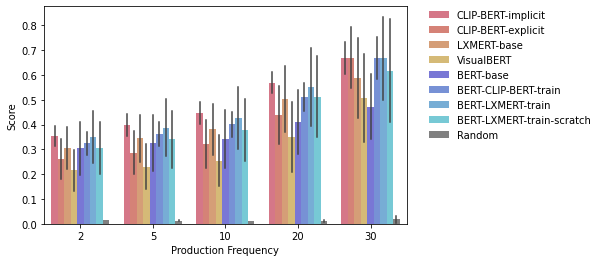

In [11]:
tmp_data = results.groupby(["model", "pf", "query_template"]).agg({"masked_score": ["mean", "count"]}) #take mean over concepts and relations
tmp_data = tmp_data.reset_index()
tmp_data.columns = ['_'.join(col) if not col[1]=="" else col[0] for col in tmp_data.columns]
tmp_data.groupby(["model", "pf"]).agg({"masked_score_mean": ["mean", "std", "count"], "masked_score_count": ["mean"]})

plt.figure(figsize=(6.5,4))

sns.barplot(x="pf", y="masked_score_mean", hue="model", ci="sd", hue_order=ORDER, palette=COLORS, data=tmp_data, errwidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
plt.xlabel("Production Frequency")
plt.ylabel("Score")

plt.savefig("../images/visual_property_norms_results.png", bbox_inches='tight')
plt.show()

## Results per query template

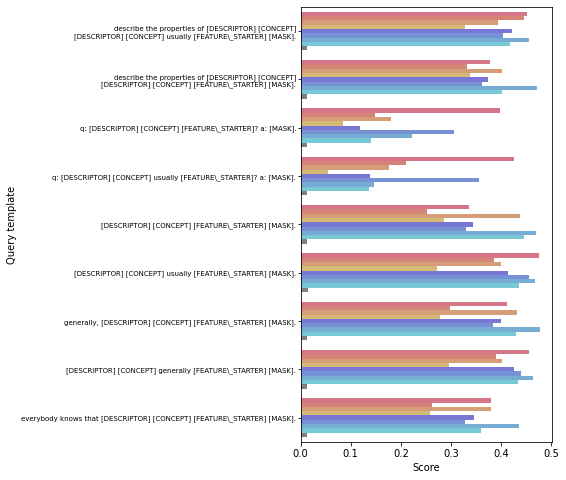

In [17]:
plt.figure(figsize=(4.5,8))

tmp_data = results.copy()
tmp_data["query_template"] = tmp_data.query_template.apply(lambda val: val.replace("_", "\_"))
b = sns.barplot(x="masked_score", y="query_template", hue="model", hue_order=ORDER, palette=COLORS, data=tmp_data, orient="h", ci=None)
_, ylabels = plt.yticks()
[ylabel.set_text(ylabel.get_text().replace(". ", "\n")) for ylabel in ylabels]
b.set_yticklabels(ylabels, size = 7)
plt.xlabel("Score")
plt.ylabel("Query template")
plt.tick_params(axis='y', which='major', pad=1)
plt.legend('', frameon=False)

plt.savefig("../images/norms_per_query_results.png", bbox_inches='tight')
plt.show()

## Score per feature relation

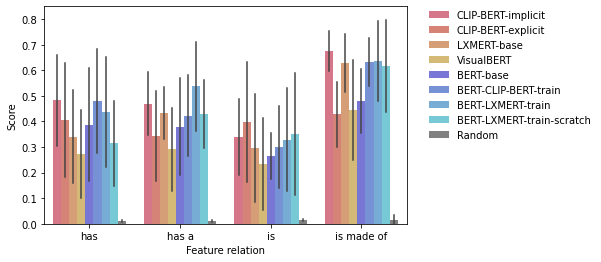

In [18]:
tmp_data = results.groupby(["model", "pf", "feature_starter", "query_template"]).agg({"masked_score": ["mean", "count"]}) #take mean over concepts
tmp_data = tmp_data.reset_index()
tmp_data.columns = ['_'.join(col) if not col[1]=="" else col[0] for col in tmp_data.columns]
tmp_data.groupby(["model", "pf", "feature_starter"]).agg({"masked_score_mean": ["mean", "std", "count"], "masked_score_count": ["mean"]})

plt.figure(figsize=(6.5,4))

sns.barplot(x="feature_starter", y="masked_score_mean", hue="model", ci="sd", hue_order=ORDER, palette=COLORS, data=tmp_data, errwidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
plt.xlabel("Feature relation")
plt.ylabel("Score")
plt.ylim([0, 0.85])

plt.savefig("../images/norms_per_relation_results.png", bbox_inches='tight')
plt.show()

## Score for color part of normdata

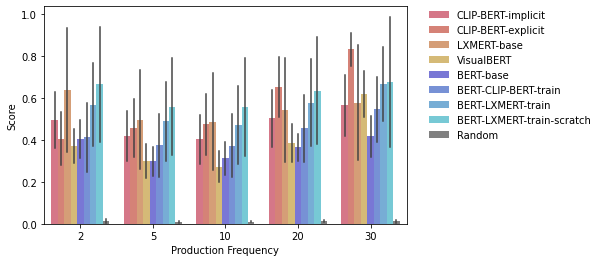

In [19]:
MEMORY_COLORS = {"black", "blue", "brown", "green", "grey", "orange", "pink", "purple", "red", "white", "yellow"}
color_mask = results.gold_labels.apply(lambda val: all([val_part in MEMORY_COLORS for val_part in val]))

tmp_data = results[color_mask].groupby(["model", "pf", "query_template"]).agg({"masked_score": ["mean", "count"]}) #take mean over concepts and relations
tmp_data = tmp_data.reset_index()
tmp_data.columns = ['_'.join(col) if not col[1]=="" else col[0] for col in tmp_data.columns]
tmp_data.groupby(["model", "pf"]).agg({"masked_score_mean": ["mean", "std", "count"], "masked_score_count": ["mean"]})

plt.figure(figsize=(6.5,4))

sns.barplot(x="pf", y="masked_score_mean", hue="model", data=tmp_data, ci="sd", hue_order=ORDER, palette=COLORS, errwidth=1.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)
plt.xlabel("Production Frequency")
plt.ylabel("Score")

plt.savefig("../images/norms_colors_results.png", bbox_inches='tight')
plt.show()